In [1]:
import requests
from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://namu.wiki/RecentChanges"

# 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

In [2]:
# a 태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)

# 중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EB%AC%BC%EB%B3%91%EC%9E%90%EB%A6%AC/%EC%9D%B8%EB%AC%BC
https://namu.wiki/w/%EA%B5%AD%EA%B0%80%20%EB%A9%B8%EB%A7%9D/%EC%82%AC%EB%A1%80/%EC%9C%84%ED%97%98%20%EA%B5%AD%EA%B0%80
https://namu.wiki/w/%ED%95%98%EC%8B%9C%EB%B9%84%EB%9D%BC%20%EC%9D%B4%EB%85%B8%EC%8A%A4%EC%BC%80/%EC%9E%91%EC%A4%91%20%ED%96%89%EC%A0%81
https://namu.wiki/w/%EC%B0%A8%EC%9D%B4%EB%82%98%EB%8A%94%20%ED%81%B4%EB%9D%BC%EC%8A%A4%20-%20%EC%A7%88%EB%AC%B8%20%EC%9E%88%EC%8A%B5%EB%8B%88%EB%8B%A4
https://namu.wiki/w/%ED%85%8C%EC%BC%80%ED%85%8C%EC%BC%80


위 과정은 개발자 도구로 살펴본 HTML 구조에 기반하여 table → tbody → tr → td → a 태그 순의 HTML 계층 구조를 좁혀나가는 과정. 목표 태그에 도달했을 때 get(href) 함수로 태그의 속성 정보 추출

## 텍스트 정보 수집하기

In [3]:
# 이전 단계와 다르게 get() 함수 대신 text() 함수를  사용하여 태그의 텍스트 정보 추출
# URL 페이지 정보를 기반으로 크롤링하기
# 하나의 최근 변경된 문서를 크롤링
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

물병자리/인물 


별자리


황도 12궁♈백양♉금우♊쌍아♋거해♌사자♍처녀♎천칭♏천갈♐인마♑마갈♒보병♓쌍어⛎(사견)황도 12궁 인물 ♈ 양자리♉ 황소자리♊ 쌍둥이자리♋ 게자리♌ 사자자리♍ 처녀자리♎ 천칭자리♏ 전갈자리♐ 궁수자리♑ 염소자리♒ 물병자리♓ 물고기자리1. 개요2. 현실2.1. ㄱ2.2. ㄴ2.3. ㄷ2.4. ㄹ2.5. ㅁ2.6. ㅂ2.7. ㅅ2.8. ㅇ2.9. ㅈ2.10. ㅊ2.11. ㅋ2.12. ㅌ2.13. ㅍ2.14. ㅎ3. 가상3.1. ㄱ3.2. ㄴ3.3. ㄷ3.4. ㄹ3.5. ㅁ3.6. ㅂ3.7. ㅅ3.8. ㅇ3.9. ㅈ3.10. ㅊ3.11. ㅋ3.12. ㅌ3.13. ㅍ3.14. ㅎ물병자리인 인물(1월 20일 ~ 2월 18일 출생자)을 정리한 문서.간미연강한나권성욱권영길기리보이기성용김립(이달의 소녀)김블루김유식김이지김인(1924)김재중김민주(IZ*ONE)김지범규현나가세 렌남우현(2003)닥터 드레더 콰이엇데이지(1999)도겸(세븐틴)도영디노(세븐틴)레몽 도메네크로제(BLACKPINK)루카스(NCT)린아렐트리메구로 렌마리아 세르게예바무라카미 싱고문재인보니 라이트배정미버논(세븐틴)보겸볼프강 아마데우스 모차르트박근혜박성훈(배우)사쿠라이 쇼산이서령(공원소녀)서유리서지수(러블리즈)선의(우주소녀)성훈(배우)소유(가수)수영(소녀시대)슬기(레드벨벳)승희신동엽심은진수현(배우)송재림아이엠야라 토모유키야부 코타양아지에바 브라운와이엇우석유노윤호유토(펜타곤)의진(빅플로)이대휘이병철이재명이대열이민정윤민용이현주(배우)오종혁에릭(신화)앤디(신화)올렉산드라 티모셴코쟈니장삐쭈정려원지성(NCT)정모(CRAVITY)지효제이홉지석진진세연진용진조섭조셉 고든레빗조우찬장윤정청하(가수)최강창민최시은최진혁카나사시 잇세이카미시라이시 모네캬리 파뮤파뮤키노(펜타곤)토머스 에디슨톰 히들스턴표예진피오하시모토 칸나한경(배우)허경환황희찬후지와라 죠이치로히라노 쇼히로타 아이카가나다순으로 배열하고 옆에다가 생일을 기재하기 바람. ex)이름 - 출연작 (X월 X일 생) 별자리만 있는 캐릭터는 생일 생략.반

# 나무위키 최근 변경 페이지 키워드 분석하기

In [4]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://namu.wiki/RecentChanges"

# 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contens_table = soup.find(name = "table")
table_body = contens_table.find(name = "tbody")
table_rows = table_body.find_all(name = "tr")

# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)

# 중복 url을 제거합니다.
page_urls = list(set(page_urls))

In [5]:
# 나무위키의 최근 변경 데이터 크롤링하기
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비합니다.
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:

    # 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name="article")
    title = contents_table.find_all('h1')[0]
    
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all('ul')) > 0:
        category = contents_table.find_all('ul')[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
        
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
    
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

# 데이터 프레임을 출력합니다.
df.head(5)

,title,category,content_text
0,물병자리/인물,별자리,황도 12궁♈백양♉금우♊쌍아♋거해♌사자♍처녀♎천칭♏천갈♐인마♑마갈♒보병♓쌍어⛎(사견...
1,국가 멸망/사례/위험 국가,역사정치,로그인 후 편집 가능한 문서입니다. 상위 문서: 국가 멸망/사례 관련 ...
2,하시비라 이노스케/작중 행적,작중 행적,상위 문서: 하시비라 이노스케이 문서에 스포일러가 포함되어 있습니다.이 문서가...
3,차이나는 클라스 - 질문 있습니다,차이나는 클라스 - 질문 있습니다JTBC 시사교양,시사교양 [ 펼치기 · 접기 ]평일 15:25월 08:30화 08:30수 08:30...
4,테케테케,도시전설일본의 요괴,일본의 도시전설테케테케 Teketeke テケテケ1. 개요2. 옷차림3. 행동4. 썰...


## 키워드 정보 추출하기
- 키워드 정보를 추출하기 위해서는 [텍스트 전처리] 작업이 필요함
    - 파이썬에서는 're'라는 모듈을 통해 *정규표현식*을 사용할 수 있음

In [6]:
# 텍스트 정제 함수: 한글 이외의 문자는 전부 제거합니다
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다....
    result = hangul.sub('', text)
    return result

print(text_cleaning(df['content_text'][0]))

황도 궁백양금우쌍아거해사자처녀천칭천갈인마마갈보병쌍어사견황도 궁 인물  양자리 황소자리 쌍둥이자리 게자리 사자자리 처녀자리 천칭자리 전갈자리 궁수자리 염소자리 물병자리 물고기자리 개요 현실 ㄱ ㄴ ㄷ ㄹ ㅁ ㅂ ㅅ ㅇ ㅈ ㅊ ㅋ ㅌ ㅍ ㅎ 가상 ㄱ ㄴ ㄷ ㄹ ㅁ ㅂ ㅅ ㅇ ㅈ ㅊ ㅋ ㅌ ㅍ ㅎ물병자리인 인물월 일  월 일 출생자을 정리한 문서간미연강한나권성욱권영길기리보이기성용김립이달의 소녀김블루김유식김이지김인김재중김민주김지범규현나가세 렌남우현닥터 드레더 콰이엇데이지도겸세븐틴도영디노세븐틴레몽 도메네크로제루카스린아렐트리메구로 렌마리아 세르게예바무라카미 싱고문재인보니 라이트배정미버논세븐틴보겸볼프강 아마데우스 모차르트박근혜박성훈배우사쿠라이 쇼산이서령공원소녀서유리서지수러블리즈선의우주소녀성훈배우소유가수수영소녀시대슬기레드벨벳승희신동엽심은진수현배우송재림아이엠야라 토모유키야부 코타양아지에바 브라운와이엇우석유노윤호유토펜타곤의진빅플로이대휘이병철이재명이대열이민정윤민용이현주배우오종혁에릭신화앤디신화올렉산드라 티모셴코쟈니장삐쭈정려원지성정모지효제이홉지석진진세연진용진조섭조셉 고든레빗조우찬장윤정청하가수최강창민최시은최진혁카나사시 잇세이카미시라이시 모네캬리 파뮤파뮤키노펜타곤토머스 에디슨톰 히들스턴표예진피오하시모토 칸나한경배우허경환황희찬후지와라 죠이치로히라노 쇼히로타 아이카가나다순으로 배열하고 옆에다가 생일을 기재하기 바람 이름  출연작 월 일 생 별자리만 있는 캐릭터는 생일 생략반드시 공식 생일만 기재 코믹스판 생일 포함 비공식 생일은 혼동이 올 수 있으므로 절대 기재하지 말것감비아  원피스 월 일 생나카스 카스미  러브 라이브 니지가사키 학원 스쿨 아이돌 동호회 월 일 생노엘  머메이드 멜로디 피치피치핏치 월 일 생니지코  베이비 프린세스 월 일 생다다  짜장소녀 뿌까 월 일 생데미 버번  제인격 월 일 생도널드 모덴  메탈슬러그 시리즈 월 일 생라크스 클라인  기동전사 건담  기동전사 건담   월 일 생레이라  누라리횬의 손자 월 일 생렌보코지 아키라  혁명기 발브레이브 월 일 생로이드 아스프

In [7]:
# 각 피처마다 데이터 전처리를 적용합니다.
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,물병자리인물,별자리,황도 궁백양금우쌍아거해사자처녀천칭천갈인마마갈보병쌍어사견황도 궁 인물 양자리 황소자...
1,국가 멸망사례위험 국가,역사정치,로그인 후 편집 가능한 문서입니다 상위 문서 국가 멸망사례 관련 문서 취약국...
2,하시비라 이노스케작중 행적,작중 행적,상위 문서 하시비라 이노스케이 문서에 스포일러가 포함되어 있습니다이 문서가 설명...
3,차이나는 클라스 질문 있습니다,차이나는 클라스 질문 있습니다 시사교양,시사교양 펼치기 접기 평일 월 화 수 수 목 금 금 웃고 떠들고 맛있는하우스맛있...
4,테케테케,도시전설일본의 요괴,일본의 도시전설테케테케 개요 옷차림 행동 썰팔꿈치귀신으로 불리기도 한다그 모습은...


키워드 추출이란 좁은 의미에서는 *명사, 혹은 형태소 단위의 문자열*을 추출하는 것
이를 위해서 *말뭉치*라는 것을 만들어야 함

In [8]:
# 각 피처마다 말뭉치를 생성합니다.
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

물병자리인물 국가 멸망사례위험 국가 하시비라 이노스케작중 행적 차이나는 클라스  질문 있습니다 테케테케 파디가 와타라 텐타몬 하이 판타지로우 판타지 초윤 이탄희 테라리아 손석희논란 및 사건사고 드래곤플라이기업 여교사 년 가요계 까오린기 틀팬시 차일드 레볼루션 절대로 검색해서는 안 될 검색어 미스 몬테크리스토 갱승제로 ㅏ인크래프트 조유리 순천제일고등학교 갤럭시  시리즈 알루카드모바일 레전드 빌드크래프트 일리노이 대학교 어배너섐페인 웃소컨텐츠 컨커러스 블레이드병종근접투창 트리 스가와라 사쿠라코 서윤얼터그레시브   페미니즘비판 및 논란 균질압연장갑 스타벅스한국경기도 가로주택정비사업 서울 버스  에이지 오브 미쏠로지신화유닛 프로젝트리그 오브 레전드 별의 커비 시리즈카피 능력 치안국가별 현황 뷰티풀 군바리등장인물소대 회전교차로목록 김치 전사 보아 마리골드 김준호코미디언 영중관계년대 월 일 임성근법조인 노회찬   챔피언결정전 용과 드래곤 쿠키 황만기 전두환별명 덱스터펜타스톰   이리나 데리우기나 년 머리카락   챔피언결정전  미국 대통령 틀유저박스취향날씨바람 월 일 김대희 사이버 학원 갤럭시 걸즈    츄정 발렌시아  메스타야   곽영재 다나짱 틀유저박스취향날씨눈 신동근 서울 지하철 호선 호대 전동차 년   로맨스 판타지 한국항공우주산업 타리크 램프티 카불 의전서열대한민국 


In [9]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)
count

Counter({'황도': 3,
         '궁': 8,
         '양금': 1,
         '쌍아': 1,
         '거': 139,
         '해사': 1,
         '처녀': 1,
         '천칭': 1,
         '마갈': 1,
         '보병': 11,
         '쌍': 15,
         '사견': 1,
         '인물': 105,
         '양자리': 1,
         '황소자리': 1,
         '쌍둥이자리': 1,
         '게자리': 1,
         '사자자리': 1,
         '처녀자리': 2,
         '천칭자리': 1,
         '전갈자리': 1,
         '궁수자리': 1,
         '염소자리': 1,
         '물병자리': 2,
         '물고기자리': 1,
         '개요': 68,
         '현실': 49,
         '가상': 14,
         '월': 994,
         '일': 1024,
         '출생': 21,
         '정리': 103,
         '간미연': 1,
         '강한나': 1,
         '권성욱': 1,
         '권영길': 7,
         '기리보이': 1,
         '기성용': 1,
         '김립': 1,
         '달': 81,
         '소녀': 57,
         '김': 130,
         '블루': 24,
         '김유식': 1,
         '김이지': 1,
         '김인': 1,
         '김재중': 1,
         '김민주': 12,
         '김지': 1,
         '범': 62,
         '규현': 1,
         '렌': 5,
         '남우현'

In [10]:
# 한 글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'문서': 1675, '문단': 1584, '이전': 1515, '역사': 1425, '공격': 817, '때문': 728, '능력': 691, '경우': 662, '이후': 604, '사람': 572, '쿠키': 558, '위험': 473, '여성': 465, '정도': 450, '내용': 438, '다른': 410, '대한': 382, '유닛': 382, '모습': 369, '사용': 369, '한국': 366, '페미니즘': 366, '자신': 359, '커비': 359, '대통령': 350, '갤럭시': 334, '미국': 333, '사실': 329, '게임': 329, '이름': 323, '영상': 322, '대학교': 318, '시간': 316, '등장': 304, '사건': 303, '생각': 299, '일본': 297, '시작': 294, '판타지': 289, '하나': 286, '문제': 273, '주의': 269, '현재': 266, '디럭스': 266, '사진': 264, '또한': 263, '부분': 259, '존재': 256, '매우': 253, '남성': 250, '방송': 248, '해당': 246, '가장': 246, '관련': 240, '일부': 238, '로맨스': 237, '다시': 234, '국가': 233, '대해': 227, '위해': 224, '추가': 222, '판매': 222, '캐릭터': 219, '가지': 217, '노회찬': 214, '멤버': 213, '사회': 212, '사거리': 212, '시리즈': 211, '모두': 208, '기본': 208, '당시': 207, '상황': 207, '장르': 207, '상태': 206, '보보': 202, '검색': 197, '이상': 193, '다만': 189, '비판': 188, '이유': 187, '전체': 186, '자체': 183, '머리': 182, '삼성': 182, '세계': 180, '대표': 179, '본인': 179, '프로젝트':

In [11]:
# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/korean_stopwords.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [12]:
# 나무위키 페이지에 맞는 불용어를 추가합니다.
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [13]:
# 키워드 데이터에서 불용어를 제거합니다.
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'문단': 1584, '이전': 1515, '역사': 1425, '공격': 817, '능력': 691, '사람': 572, '쿠키': 558, '위험': 473, '여성': 465, '대한': 382, '유닛': 382, '한국': 366, '페미니즘': 366, '커비': 359, '대통령': 350, '갤럭시': 334, '미국': 333, '게임': 329, '영상': 322, '대학교': 318, '등장': 304, '사건': 303, '일본': 297, '시작': 294, '판타지': 289, '문제': 273, '주의': 269, '현재': 266, '디럭스': 266, '사진': 264, '부분': 259, '존재': 256, '남성': 250, '방송': 248, '관련': 240, '일부': 238, '로맨스': 237, '다시': 234, '국가': 233, '대해': 227, '위해': 224, '판매': 222, '캐릭터': 219, '가지': 217, '노회찬': 214, '멤버': 213, '사회': 212, '사거리': 212, '시리즈': 211, '기본': 208, '당시': 207, '장르': 207, '상태': 206, '보보': 202, '검색': 197, '비판': 188, '이유': 187, '전체': 186, '자체': 183, '머리': 182, '삼성': 182, '세계': 180, '대표': 179, '본인': 179, '프로젝트': 179, '사이트': 178, '다년': 177, '작품': 176, '슈퍼': 176, '대한민국': 175, '이야기': 175, '처음': 175, '참고': 174, '속도': 174, '데미지': 174, '기술': 171, '투창': 171, '선호': 169, '원거리': 166, '물고기': 165, '체력': 164, '파이터': 163, '방어': 163, '스타': 162, '피해': 162, '발생': 161, '수준': 161, '지역': 159

In [14]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


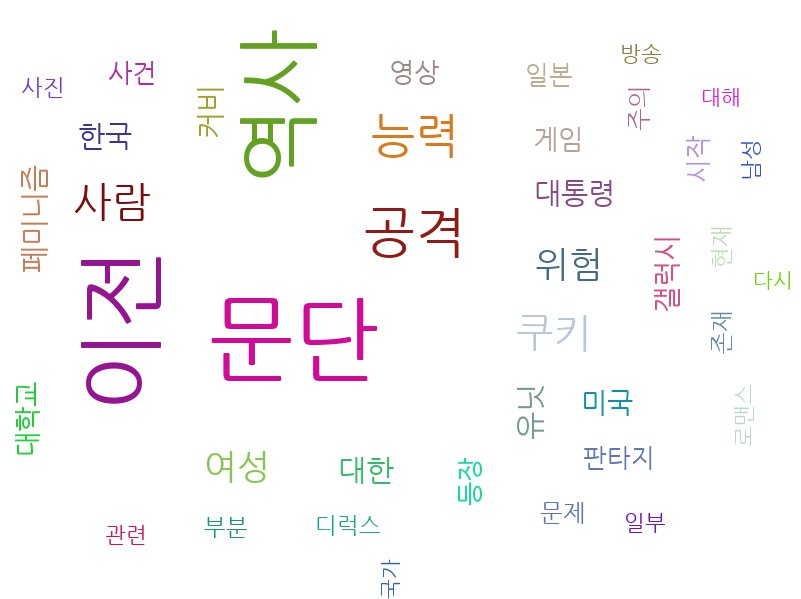

In [15]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
Image(filename='wordcloud.jpg')